## Libraries

In [13]:
# data loading
import pickle

# data manipulation
import numpy as np
import pandas as pd

# data representation
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# evaluation metrics for classification
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# ignore warning
import warnings
from sklearn.exceptions import DataConversionWarning

In [14]:
warnings.filterwarnings("ignore", category=DataConversionWarning)

## Loading Data

In [2]:
def unpickle_file(file_name):
    with open(file_name, 'rb') as f:
        data= pickle.load(f)
    return data

In [4]:
train_features= unpickle_file('Data/resampled_train_features.pkl')
train_target= unpickle_file('Data/resampled_train_target.pkl').to_frame()
test_features= unpickle_file('Data/test_features.pkl')
test_target= unpickle_file('Data/test_target.pkl').to_frame()

# Model Selection

## Helper Functions

In [5]:
def plot_CM(true, predicted):
    # Calculate confusion matrix
    CM = confusion_matrix(true, predicted)
    
    # Convert each cell to percentage
    CM_percentage = CM / CM.sum(axis=1, keepdims=True) * 100

    # Drawing heatmap for confusion matrix with percentage values
    plt.figure(figsize=(4, 4))
    sns.heatmap(CM_percentage,
                annot=True,
                fmt='.2f',
                cmap='Blues',
                cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    
    # Representation
    plt.title('Confusion Matrix (Percentage)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [6]:
def evaluate_model(model, model_name, train_features, test_features, train_target, test_target):
    # fit model on train data
    model.fit(train_features, train_target)
    
    # find predictions for train and test data
    train_prediction= model.predict(train_features)
    test_prediction= model.predict(test_features)
    
    train_accuracy= accuracy_score(train_target, train_prediction)*100
    train_recall= recall_score(train_target, train_prediction)*100
    test_accuracy= accuracy_score(test_target, test_prediction)*100
    test_recall= recall_score(test_target, test_prediction)*100
    
    # evalute model performance
    print('='*150)
    print(f'MODEL : {model_name}')
    print('='*150)
    print('TRAIN DATA')
    print('-'*150)
    print(f'ACC: {train_accuracy:.3f} %')
    print(f'REC: {train_recall:.3f} %')
    print('-'*150)
    print('TEST DATA')
    print('-'*150)
    print(f'ACC: {test_accuracy:.3f} %')
    print(f'REC: {test_recall:.3f} %')
    print('-'*150)
    plot_CM(test_target, test_prediction)

In [8]:
classification_models = {'Logistic Regression': LogisticRegression(max_iter= 1000),
                         'Random Forest Classifier': RandomForestClassifier()}

MODEL : Logistic Regression
TRAIN DATA
------------------------------------------------------------------------------------------------------------------------------------------------------
ACC: 99.926 %
REC: 99.910 %
------------------------------------------------------------------------------------------------------------------------------------------------------
TEST DATA
------------------------------------------------------------------------------------------------------------------------------------------------------
ACC: 99.941 %
REC: 99.891 %
------------------------------------------------------------------------------------------------------------------------------------------------------


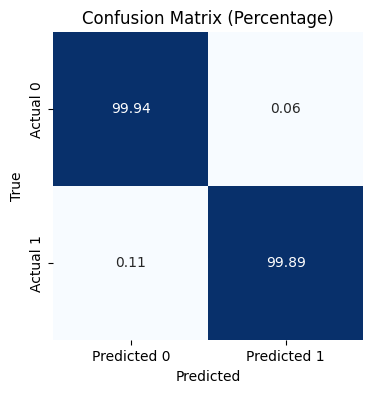

MODEL : Random Forest Classifier
TRAIN DATA
------------------------------------------------------------------------------------------------------------------------------------------------------
ACC: 100.000 %
REC: 100.000 %
------------------------------------------------------------------------------------------------------------------------------------------------------
TEST DATA
------------------------------------------------------------------------------------------------------------------------------------------------------
ACC: 100.000 %
REC: 100.000 %
------------------------------------------------------------------------------------------------------------------------------------------------------


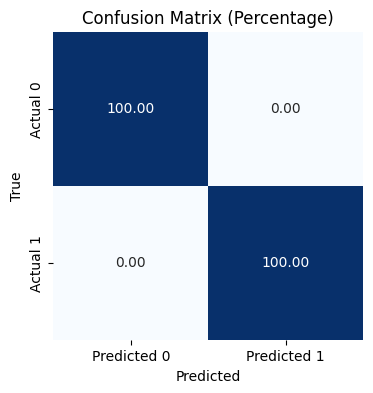

In [12]:
for model_name, model_object in classification_models.items():
    evaluate_model(model_object, model_name, train_features, test_features, train_target, test_target)

**Model Selected:** Random Forest Classifier